In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [71]:
data = np.loadtxt('dataset/Regression/BivariateData/32.csv', delimiter=",")

In [72]:
data

array([[0.8   , 0.3   , 1.9334],
       [0.31  , 0.78  , 4.3952],
       [0.    , 0.8   , 3.6794],
       ...,
       [0.64  , 0.85  , 4.7086],
       [0.31  , 0.47  , 3.0355],
       [0.6   , 0.9   , 5.0586]])

In [73]:
data.shape

(10201, 3)

In [74]:
def plot(data):  
  x , y , z = data[:,0] , data[:,1] , data[:,2]
  fig = plt.figure(figsize = (10, 7))
  ax = plt.axes(projection ="3d")
 
  # Creating plot
  ax.scatter3D(x, y, z, edgecolor="black")
  # show plot  
  plt.title("Bivariate Dataset")

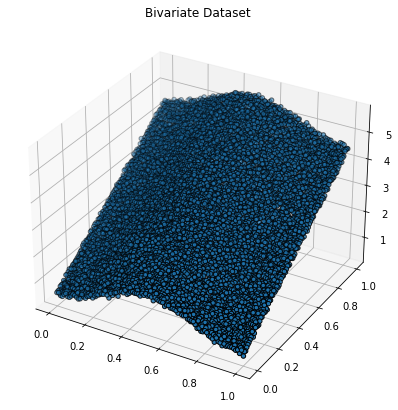

In [75]:
plot(data)

In [76]:
def train_test_split(data):
    m, n = data.shape
    l1 = int(0.6*m)
    l2 = l1 + int(0.2*m)
    training = data[:l1]
    validation = data[l1:l2]
    test = data[l2:m]
    
    return training, validation, test

In [77]:
train_data,valid_data, test_data = train_test_split(data)

In [78]:
print(train_data.shape)
print(valid_data.shape)
print(test_data.shape)

(6120, 3)
(2040, 3)
(2041, 3)


In [91]:
def sigmoid_af(x):
    s = 1/(1+np.exp(-(x)))
    return s

def linear(x):
    y = x
    return y

In [92]:
def inst_error(y, yp):
    return sum(0.5*(y-yp)**2)

In [123]:
def training(xn,n1,n2):
    N,d=xn.shape
    wh1 = 0.01*np.random.randn(3, n1+1)
    wh2 = 0.01*np.random.randn(n1+1, n2+1)
    wo = 0.01*np.random.randn(n2+1, 1)
    avg_err = []
    epoch = 50
    
    while(epoch):
    
        err = []
        
        for i in range(N):
            
            y = xn[i, 2]

            xi = [1, xn[i,0], xn[i,1]] #Input layer
            h1 = np.dot(wh1.T, xi) #hidden layer 1 out
            a1 = sigmoid_af(h1) #hidden layer 1 activation out
            h2 = np.dot(wh2.T, a1) #hidden layer 2 out
            a2 = sigmoid_af(h2) #hidden layer 2 activation out
            out = np.dot(wo.T, a2) #Output layer out
            ao = out #Output activation 
               
            en = inst_error(y, ao)
            err.append(en)
            neta = 0.01
            
            #Update weights
            wo = wo + (neta * np.outer(a2, (y-ao)))
                        
            var1 = np.dot(wo, (y-ao))
            var2 = a2*(1-a2)
            wh2 = wh2 + (neta * np.outer(a1, var1*var2))
            
            var3 = var1*var2
            var4 = np.dot(wh2, var3)
            var5 = a1*(1-a1)
            wh1 = wh1 + (neta * np.outer(xi, var4*var5))

            
        avg_error = sum(err)/len(err)
        avg_err.append(avg_error)
        if epoch%1==0:
            print("ERROR: ",avg_error)
        epoch -= 1
    
    return wh1, wh2, wo, avg_err

wh11, wh21, wo1, avg_err1 = training(train_data,3,2)
wh12, wh22, wo2, avg_err2 = training(train_data,4,4) 

ERROR:  0.7205301441101132
ERROR:  0.4970175048936454
ERROR:  0.35398118070950524
ERROR:  0.27974351945464326
ERROR:  0.24065522913040044
ERROR:  0.21790770325573375
ERROR:  0.20351396814429568
ERROR:  0.19381086557171498
ERROR:  0.18694688836979265
ERROR:  0.18190567663996646
ERROR:  0.17809081570155624
ERROR:  0.17513290480106797
ERROR:  0.17279279639506834
ERROR:  0.17090986168729538
ERROR:  0.16937280593229104
ERROR:  0.16810244109078337
ERROR:  0.1670411153956917
ERROR:  0.16614600719800057
ERROR:  0.16538474474258597
ERROR:  0.1647324709726901
ERROR:  0.16416983149768138
ERROR:  0.16368156713521592
ERROR:  0.16325551126778473
ERROR:  0.16288186372606356
ERROR:  0.1625526570142536
ERROR:  0.162261358542272
ERROR:  0.16200257048832045
ERROR:  0.16177180071930766
ERROR:  0.1615652860921516
ERROR:  0.16137985482601605
ERROR:  0.161212818338436
ERROR:  0.16106188552849532
ERROR:  0.16092509432542917
ERROR:  0.16080075663679347
ERROR:  0.16068741378429513
ERROR:  0.16058380021402235
ER

In [124]:
def testing(test_data, wh1, wh2, wo):
    N=len(test_data)
    z_pred_list = []
    err=[]
    a1_list=[]
    a2_list=[]
    for i in range(N):
        z_true=test_data[i, 2]
        xi = [1, test_data[i,0], test_data[i,1]]        
        h1 = np.dot(wh1.T, xi)
        a1 = sigmoid_af(h1)
        a1_list.append(a1)
        
        h2 = np.dot(wh2.T, a1)
        a2 = sigmoid_af(h2)
        a2_list.append(a2)

        z_pred = np.dot(wo.T, a2)
        e=(z_true-z_pred)**2
      
        z_pred_list.append(z_pred)
        err.append(e)
    mse=sum(err)/len(err)       

    return z_pred_list,mse,np.array(a1_list),np.array(a2_list) 

z_pred_ts,msets,h1,h2 = testing(test_data, wh12, wh22, wo2)
z_pred_tr,msetr,h1,h2  = testing(train_data,wh12, wh22, wo2)
z_pred_vd,msevd,h1,h2  = testing(valid_data, wh12, wh22, wo2)


In [125]:
yp1,mse1,h11,h21=testing(test_data,wh11, wh21, wo1)
yp2,mse2,h12,h22=testing(test_data,wh12, wh22, wo2)

Text(0.5, 0.5, 'input axis 2')

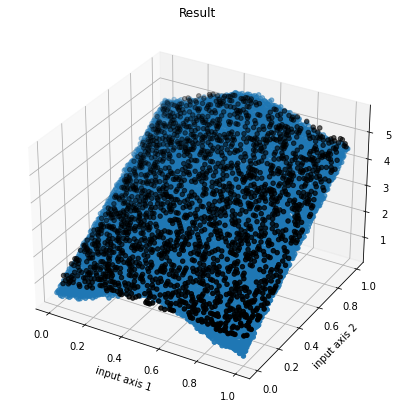

In [126]:
x , y , z = data[:,0] , data[:,1] , data[:,2]
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
ax.scatter3D(x, y, z )
ax.scatter3D(test_data[:,0], test_data[:,1], z_pred_ts , color="black")

plt.title("Result")
plt.xlabel("input axis 1")
plt.ylabel("input axis 2")

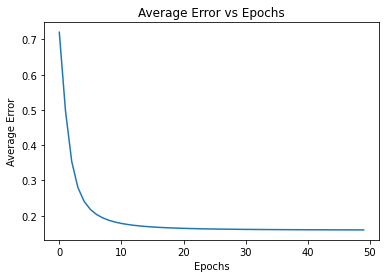

In [127]:
plt.plot(avg_err1)
plt.title("Average Error vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Average Error")
plt.show()

<ipython-input-128-afbe736b0a73>:2: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  y=[np.asscalar(msetr),np.asscalar(msets)]


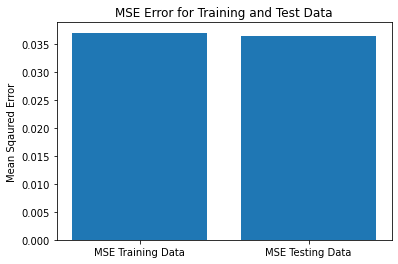

In [128]:
x=["MSE Training Data","MSE Testing Data"]
y=[np.asscalar(msetr),np.asscalar(msets)]

plt.bar(x,y)

plt.title("MSE Error for Training and Test Data")
plt.ylabel("Mean Sqaured Error")
plt.show()

Text(0.5, 0.92, 'Modelled vs Target (Train)')

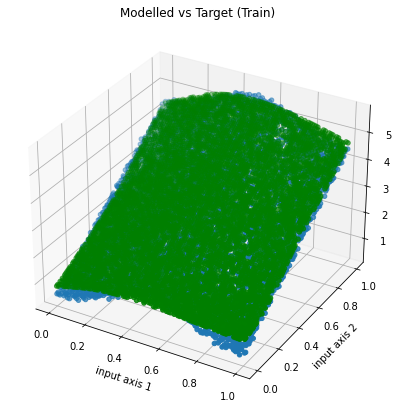

In [133]:
x , y , z = train_data[:,0] , train_data[:,1] , train_data[:,2]
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
ax.scatter3D(x, y, z)
ax.scatter3D(train_data[:,0], train_data[:,1], z_pred_tr , color="green")

plt.xlabel("input axis 1")
plt.ylabel("input axis 2") 
plt.title("Modelled vs Target (Train)")

Text(0.5, 0.92, 'Modelled vs Target (Test)')

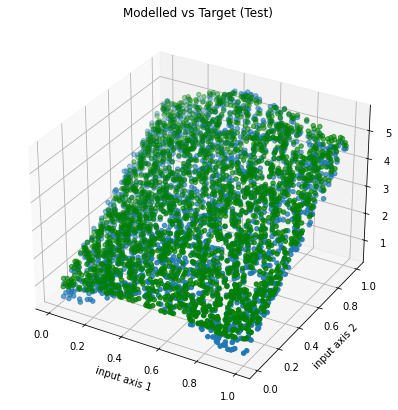

In [134]:
x , y , z = test_data[:,0] , test_data[:,1] , test_data[:,2]
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
  # Creating plot
ax.scatter3D(x, y, z)
ax.scatter3D(test_data[:,0], test_data[:,1], z_pred_ts , color="green")
  # show plot 
plt.xlabel("input axis 1")
plt.ylabel("input axis 2") 
plt.title("Modelled vs Target (Test)")

Text(0, 0.5, 'Model output')

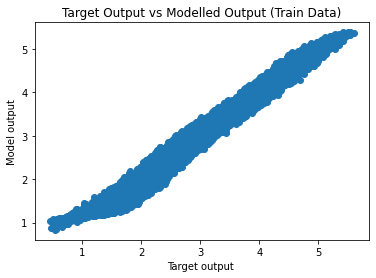

In [131]:
plt.scatter(train_data[:,2],z_pred_tr)  
plt.title("Target Output vs Modelled Output (Train Data)")
plt.xlabel("Target output ")
plt.ylabel("Model output")

Text(0, 0.5, 'Model output')

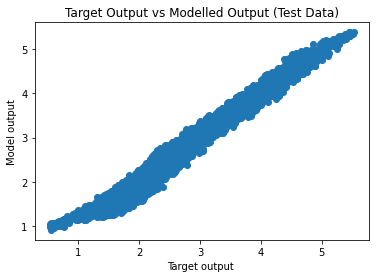

In [132]:
plt.scatter(test_data[:,2],z_pred_ts)
plt.title("Target Output vs Modelled Output (Test Data)")
plt.xlabel("Target output ")
plt.ylabel("Model output")